In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
##Train Test Split
from sklearn.model_selection import train_test_split
df1 = df.drop(['index', 'Patient Id'], axis=1)
X = df.drop(['index','Level', 'Patient Id'], axis=1)
y = df['Level']

display(X.head())
display(y.head())

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object

In [7]:
# Random Forest and Boruta
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)
from boruta import BorutaPy
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=113)
# find all relevant features
feat_selector.fit(np.array(X_train), np.array(y_train))
# check selected features
display(feat_selector.support_)
# check ranking of features
display(feat_selector.ranking_)
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(np.array(X_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
I

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [8]:
#  Get the importance scores of each feature
importance_scores = forest.feature_importances_
features = X_train.columns
for feature, importance in zip(features, importance_scores):
    print(f"{feature}: {importance}")

Age: 0.0048675068633058675
Gender: 0.00040246811382930374
Air Pollution: 0.04956575639424308
Alcohol use: 0.05869135515072578
Dust Allergy: 0.04868047300155557
OccuPational Hazards: 0.04074349080770616
Genetic Risk: 0.034821889858713775
chronic Lung Disease: 0.017949131568809364
Balanced Diet: 0.05353473378023435
Obesity: 0.07546175824620836
Smoking: 0.0433914898773002
Passive Smoker: 0.07088541049755143
Chest Pain: 0.03505511355330254
Coughing of Blood: 0.11679385154370767
Fatigue: 0.060059368549883384
Weight Loss: 0.02729732032109396
Shortness of Breath: 0.0325312168973091
Wheezing: 0.07942409179020835
Swallowing Difficulty: 0.03676309725234689
Clubbing of Finger Nails: 0.0327504295374356
Frequent Cold: 0.027687099091078474
Dry Cough: 0.01948308816458295
Snoring: 0.030540962382680687


In [9]:
#  Boruta attempt # 2

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Define the random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Fit the classifier to the training data
forest.fit(X_train, y_train)

# Define the Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=113, perc=80)

# Perform feature selection
feat_selector.fit(np.array(X_train), np.array(y_train))

# Print selected features
print("Selected Features:", feat_selector.support_)

# Print feature ranking
print("Feature Ranking:", feat_selector.ranking_)

# Filter the training data based on selected features
X_filtered = feat_selector.transform(np.array(X_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
I

Coughing of Blood: 0.09187994859342381
Obesity: 0.09132548247582435
Wheezing: 0.08268445035644358
Passive Smoker: 0.0744446757664978
Alcohol use: 0.06804532120753436
Fatigue: 0.06624137937681762
Dust Allergy: 0.060977376896281715
Balanced Diet: 0.050127678162086076
Genetic Risk: 0.047127415172782024
Swallowing Difficulty: 0.044055044228704036
Snoring: 0.04019649051165454
Shortness of Breath: 0.03367035237598749
OccuPational Hazards: 0.03304952288698313
Chest Pain: 0.03206830991344756
Smoking: 0.031080909338272865
Clubbing of Finger Nails: 0.031009029505090886
Air Pollution: 0.027906820528607938
Weight Loss: 0.02600270274420572
Frequent Cold: 0.02305908761117345
chronic Lung Disease: 0.01971567716208888
Dry Cough: 0.016710954464606048
Age: 0.004527222057121508
Gender: 0.0008812523111182955


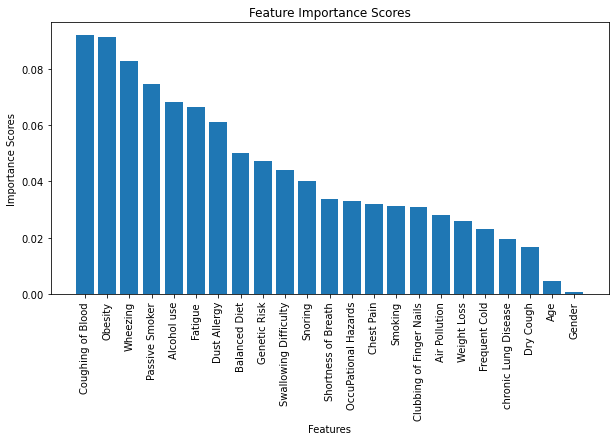

In [10]:
# Check feature importance scores from RF

importance_scores = forest.feature_importances_
features = X_train.columns
# create a dictionary to store feature importance scores
feature_importance_dict = dict(zip(features, importance_scores))
# sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
# print the feature importance scores in descending order
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    
import matplotlib.pyplot as plt

# plot feature importance scores
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance Scores')
plt.show()


In [11]:
#  RFE attempt 1

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
rfc = RandomForestClassifier()

# create the RFE model and select the top 10 features
rfe = RFE(rfc, n_features_to_select=11)
rfe.fit(X_train, y_train)

# print the selected features
rfe_selected_features = X_train.columns[rfe.support_]

In [12]:
#  SelectKBest attempt 1

from sklearn.feature_selection import SelectKBest, f_classif

# define the number of features to select
num_features = 11

# define the feature selection method
feat_selector = SelectKBest(f_classif, k=num_features)

# fit the method on the training data
feat_selector.fit(X_train, y_train)

# get the boolean mask for the selected features
feature_mask = feat_selector.get_support()

# get the names of the selected features
skb_selected_features = X_train.columns[feature_mask]

# print the selected features
print("Selected features:")
print(skb_selected_features)

Selected features:
Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
       'Chest Pain', 'Coughing of Blood', 'Fatigue'],
      dtype='object')


In [13]:
# Compare both feature selections to see common chosenb features

# print the selected features from RFE
print("Selected features from RFE:")
print(rfe_selected_features)

# print the selected features from SelectKBest
print("Selected features from SelectKBest:")
print(skb_selected_features)

# get the common features from RFE and SelectKBest
common_features = set(rfe_selected_features) & set(skb_selected_features)

# print the common features
print("Common features:")
print(common_features)

Selected features from RFE:
Index(['Alcohol use', 'Dust Allergy', 'Balanced Diet', 'Obesity',
       'Passive Smoker', 'Coughing of Blood', 'Fatigue', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Snoring'],
      dtype='object')
Selected features from SelectKBest:
Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
       'Chest Pain', 'Coughing of Blood', 'Fatigue'],
      dtype='object')
Common features:
{'Fatigue', 'Dust Allergy', 'Alcohol use', 'Balanced Diet', 'Passive Smoker', 'Coughing of Blood', 'Obesity'}


In [8]:
# Model creation and Backwards Feature Selection attempt

# Import the required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training data
y_pred = rf.predict(X_train)

# Calculate the accuracy of the model on the training data
accuracy = accuracy_score(y_train, y_pred)

# Print the accuracy of the model
print('Accuracy of the model on the training data:', accuracy)

# Predict using the test data set
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score of random forest model on test data set:", accuracy)

Accuracy of the model on the training data: 1.0
Accuracy score of random forest model on test data set: 1.0


In [14]:
#  We have an overfiting problem with the model.  Let's use backwards feature selection to attempt to remediate this.

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# create the random forest classifier object
rfc = RandomForestClassifier()

# create the feature selector object
selector = RFECV(estimator=rfc, step=1, cv=5, scoring="accuracy")
selector.fit(X, y)

# select the top 10 features based on their importance ranking
selected_features = X.columns[selector.ranking_ <= 6]
print(selected_features)

Index(['Alcohol use', 'Dust Allergy', 'Obesity', 'Passive Smoker',
       'Coughing of Blood', 'Fatigue', 'Wheezing', 'Clubbing of Finger Nails'],
      dtype='object')


In [15]:
#  Using the above chosen features, we can now rerun the Random Forest Model to check for overfitting

# select only the chosen features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# create a new random forest classifier with default hyperparameters
rfc_selected = RandomForestClassifier()

# fit the model on the training data with selected features
rfc_selected.fit(X_train_selected, y_train)

# make predictions on the testing data
y_pred_selected = rfc_selected.predict(X_test_selected)

# calculate the accuracy score of the model on the testing data
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on testing dataset with selected features:", accuracy_selected)

Accuracy on testing dataset with selected features: 1.0


In [19]:
#  We are still overfitting.  We may need a different approach to fix this issue!  Below we decrease the maximum depth to 5 for the decision trees in the random forest model:

# create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# create the feature selector object
selector = RFECV(estimator=rfc, step=1, cv=5, min_features_to_select=10)

# fit the feature selector on the training data
selector = selector.fit(X_train, y_train)

# print the selected features
print("Selected Features:", X_train.columns[selector.support_])

# create a new random forest classifier with the selected features
rfc_selected = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
X_train_selected = X_train[X_train.columns[selector.support_]]
X_test_selected = X_test[X_train.columns[selector.support_]]
rfc_selected.fit(X_train_selected, y_train)

# predict on the testing data
y_pred = rfc_selected.predict(X_test_selected)

# calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Selected Features: Index(['Alcohol use', 'Dust Allergy', 'Balanced Diet', 'Obesity',
       'Passive Smoker', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath',
       'Wheezing', 'Clubbing of Finger Nails'],
      dtype='object')
Accuracy: 0.984


In [ ]:
# Better, but still high!  We will continue to attemp different techniques to solve this issue.